In [8]:
import schedule
import seaborn as sns
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime as dt
from datetime import date

def daily_job():

    url = 'https://content.guardianapis.com/search'
    search_term = 'Justin Trudeau'
    date_today = date.today().strftime("%Y-%m-%d")

    params = {'api-key': 'test',
                'page-size': 50,  # Page Size 100 or 200 caused an error.
                'q': search_term,
                'from-date': "2018-01-01",
                'to-date': date_today,
                'page': 1
                }

    def query_api(url, params):
            """
            Function to query the Guardian API with the preffered search term.
            The output is a int with the amount of results and a string with the actual date and the amount of results to verify.
            """
            response = requests.get(url, params)
            return response.json()

    json_result = query_api(url, params)

    def query_all_articles(url, params):
            """
            Function to iterate trough all the results/pages from the query and add the results to one dataframe.
            The function adds at the params dict "page" in every iteration +1, to go trough every page automated. 
            """
            df = pd.DataFrame(columns=['id', 'type', 'sectionId', 'sectionName', 'webPublicationDate',
                            'webTitle', 'webUrl', 'apiUrl', 'fields', 'isHosted', 'pillarId', 'pillarName'])

            if int(json_result['response']['total']) > 200:
                #for i in range(0,20):
                for i in range(0, (int((json_result['response']['total']) / int(params['page-size']) + 1))):
                    # To check the iterations
                    print('Iterate through page number ' + str(params['page']))
                    data = pd.DataFrame(query_api(url, params)[
                                        'response']['results'])
                    df = pd.concat([df, data])
                    params['page'] = int(params['page']) + 1
                    time.sleep(3)

            return df

    df_guardian = query_all_articles(url, params)

    # Data cleaning
    df_guardian['webPublicationDate'] = pd.to_datetime(df_guardian['webPublicationDate']).dt.strftime("%Y-%m-%d")
    df_guardian = df_guardian.set_index('webPublicationDate')
    df_guardian.drop_duplicates(inplace=True)
    df_guardian.drop_duplicates(subset=['webTitle'], inplace=True)

    df_cleaned = df_guardian.loc[:, ['type', 'sectionId', 'sectionName', 'webTitle']]

    # Set mask for type "article"
    mask_article = df_cleaned.iloc[:, 0] == 'article'

    # Define df with the type 'article' and the date between 01.01.2018 - today
    df_article = df_cleaned.loc[mask_article, :]

    # Create table with "Date" and "No. of articles"
    df_date = pd.crosstab(df_article.index, columns='No. of article', rownames=[''], colnames=['Date'])

    # Had to change the index and add some date columns for a easier handling
    df_plot = df_date.reset_index()
    df_plot = df_plot.rename_axis(None, axis=1)
    df_plot['month-year'] = pd.to_datetime(df_plot['']).dt.to_period('M').dt.strftime('%Y %m')
    df_plot['month'] = pd.to_datetime(df_plot['']).dt.to_period('M').dt.strftime('%m')

    # Plot the data
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.lineplot(x='month-year', y='No. of article', data=df_plot, alpha=0.8)

    # Style
    fig.suptitle('Guardian Media article Evolution about Justin Trudeau since 01.01.2018', fontsize = 24)
    ax.set_xlabel('')
    ax.set_ylabel('No. of article', fontsize = 16)
    ax.xaxis.set_tick_params(labelrotation=25)
    ax.set_xticks(ax.get_xticks()[::2])

    plt.tight_layout()

    plt.savefig('Evolution_'+str(date_today)+'.pdf', format='pdf')


#schedule.every(10).seconds.do(daily_job)
#schedule.every().day.at("02:00").do(daily_job)

#while True:
#        schedule.run_pending()
#        time.sleep(1)

### Daily Job
***
Durch einen Daily Job, möchte ich das Diagramm aus Aufgabe 5 täglich aktualisieren und aufbereiten, damit es an ausstenehende Personen gesendet werden kann. 

**Challenge:** 
- Welche Methode verwendet ich für den Daily Job
- Wie stelle ich das Diagramm dar um es zu exportieren

**Lösung:**
- Ich verwende Pytohn scheduler Modul um das Skript jede Nacht um 02:00 auszuführen.
- Ich erstelle ein automatisiertes PDF mit dem Diagramm, welches automatisch abgelegt wird und versendet werden kann.  

**Ergebnis:**
- Das komplett benötigte Skript inkl. den Scheduler
- Ein PDF Export mit dem Diagramm 

**Zusätzliche Lösung:**

Es würde in diesem Fall auch andere Lösungen geben. Lokal könnte zb. mit cron Jobs oder dem Windows scheduler gearbeitet werden, um das Skript auszuführen (nicht unbedingt optimal für eine Business Umgebung). Für mich wäre jedoch die optimalste Lösung, das Python File auf einem Server laufen zu lassen und die Daten direkt in eine Datenbank zu übertragen, von welcher dann Reports oder Dashboards erstellt werden können. 

Für das PDF Diagramm gibt es natürlich noch viele weiter Layoutoptionen. Ich habe mich lediglich für eine Basisvariante entschieden, welche durch den Diagrammtitel den Inhalt beschreibt. 

Ganz grundsätzlich, würde ich in der Praxis keinen regelmässigen Report versenden, welcher die Daten über drei Jahre in dieser Form darstellt, da die vielen Datumsangaben doch eher unübersichtlich sind. Für eine erste ad-hoc Analyse und eine kurze Übersicht ist es in meinen Augen jedoch passend. 

Iterate through page number 1
Iterate through page number 2
Iterate through page number 3
Iterate through page number 4
Iterate through page number 5
Iterate through page number 6
Iterate through page number 7
Iterate through page number 8
Iterate through page number 9
Iterate through page number 10
Iterate through page number 11
Iterate through page number 12
Iterate through page number 13
Iterate through page number 14
Iterate through page number 15
Iterate through page number 16
Iterate through page number 17
Iterate through page number 18
Iterate through page number 19
Iterate through page number 20
Iterate through page number 21
Iterate through page number 22
Iterate through page number 23
Iterate through page number 24
Iterate through page number 25
Iterate through page number 26
Iterate through page number 27
Iterate through page number 28
Iterate through page number 29
Iterate through page number 30
Iterate through page number 31
Iterate through page number 32
Iterate through p

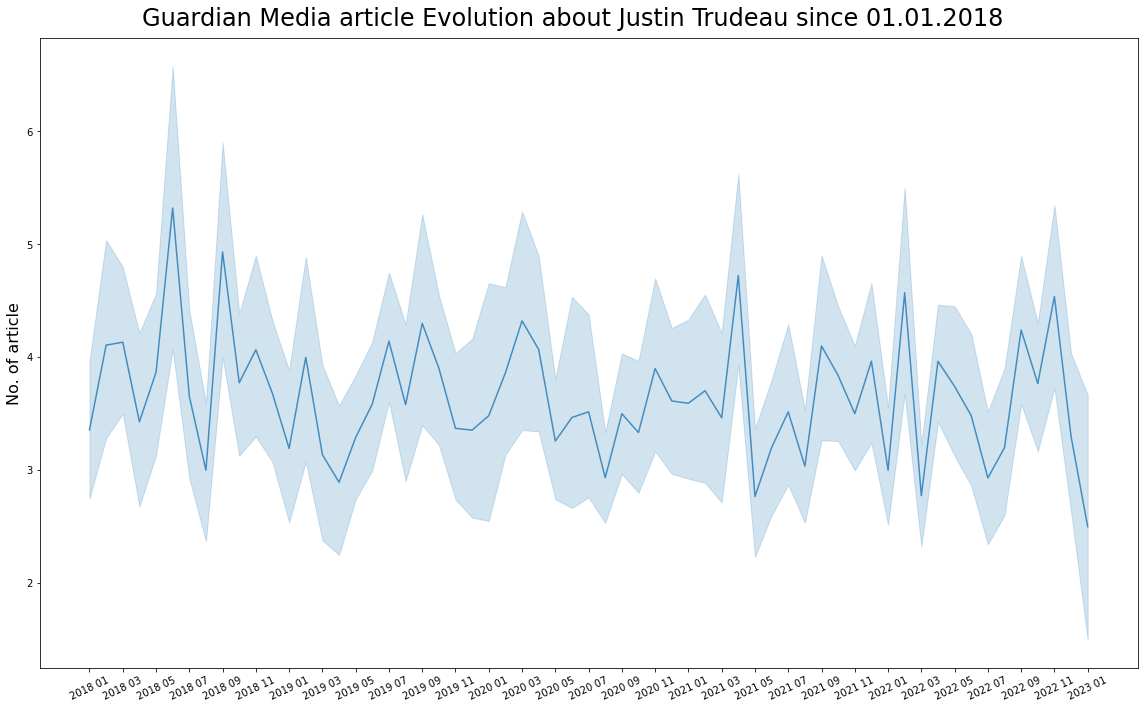

In [9]:
daily_job()